<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 2.2.2

## Statistical Proof

### Part 1: Student's t-Test

The *t*-test is probably the most used statistical test. It measures the likelihood that a sample belongs to a given distribution, and incorporates a correction for the finite size of the sample.

#### Using the t-test to compare two means

Here, suppose we have two sets of measurements and we want to know if they both came from the same distribution.

For example, in [this](https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data) dataset these could be age of house in one group and median value of house in another group, and we are testing the null hypothesis that there is no difference between the two groups.

#### Collect Data

You can find the original data [here](https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data).

Data dictionary is available [here](https://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html).

In [1]:
import pandas as pd
import numpy as np
import math

from scipy import stats
from matplotlib import pyplot as plt

import seaborn as sns
sns.set(rc={'figure.figsize': (15, 10)})

import pandas as pd
pd.set_option("display.max_rows", 120)
pd.set_option("display.max_columns", 120)

%matplotlib inline

In [2]:
names = ["CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT", "MEDV"]
data = pd.read_csv("housing.data", header=None, names=names, delim_whitespace=True)

In [3]:
# Head
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [4]:
# Shape
data.shape

(506, 14)

##### 1. Plot Histogram of `RM`

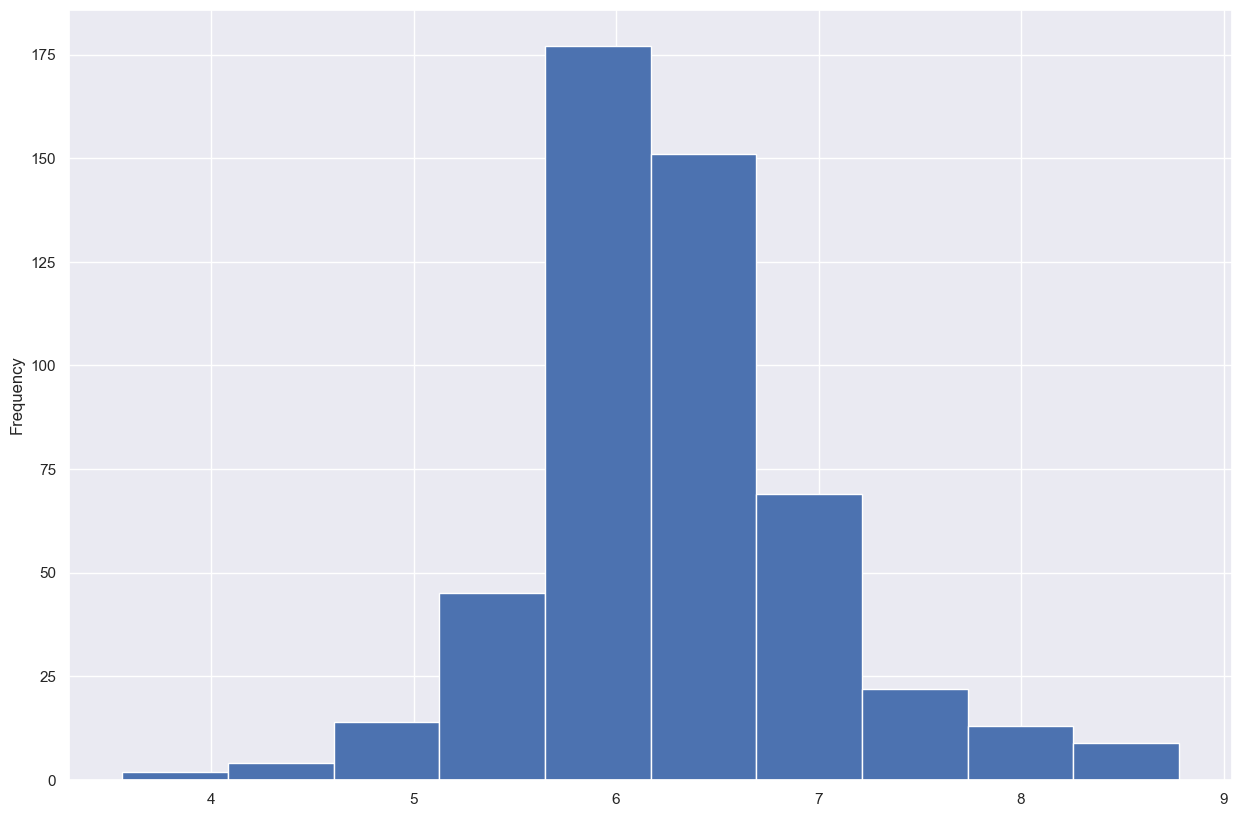

In [5]:
#  ANSWER
RM = data['RM']
RM.plot(kind='hist');

The histogram of the RM column in the Boston housing dataset indicates that the average number of rooms per dwelling is typically around 6 to 7 rooms, with a slightly left-skewed distribution. This means that most homes in this dataset are moderately sized, with few extremely small or large homes.

##### 2. Plot Histogram of `MEDV`

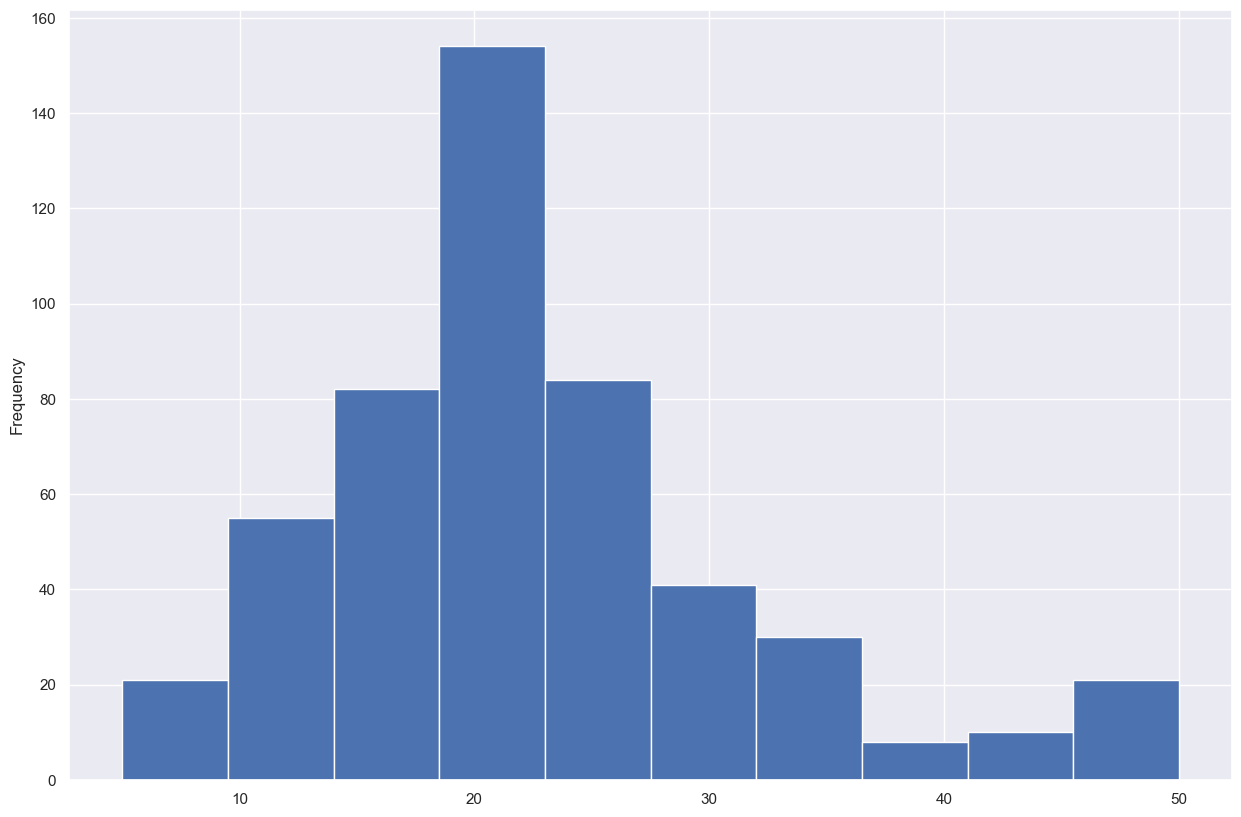

In [6]:
MEDV = data['MEDV']
MEDV.plot(kind='hist');

The histogram of the MEDV column in the Boston housing dataset indicates that the most common median value of owner-occupied homes is around $20,000 to $25,000, with the distribution showing a right skew. This suggests that while the majority of homes have lower median values, there are a few homes with significantly higher values, creating a long tail in the distribution.

##### 3.A Draw Scatter Plot of `RM` & `MEDV`

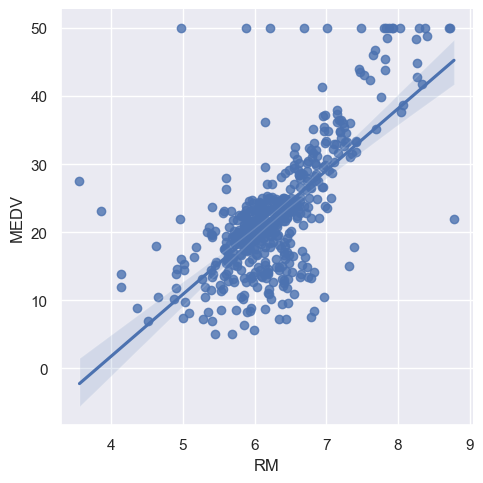

In [7]:
# ANSWER
sns.lmplot(x="RM", y="MEDV", data=data);

The scatter plot with a linear regression line indicates a positive relationship between the average number of rooms per dwelling (RM) and the median value of owner-occupied homes (MEDV) in the Boston housing dataset. As the number of rooms increases, the median home value generally increases. The spread of data points around the trend line suggests that while RM is a significant predictor of MEDV, other factors also play a role in determining home values.

In [8]:
data['RM'].mean()

6.284634387351779

##### 3.B Is there any trend? State your observation.

**ANSWER:**: There is a positive correlation between `RM` & `MEDV`.

We'll be using following steps:

- Define hypothesis
- Set alpha (Let alpha = 0.05)
- Calculate point estimate
- Calculate test statistic
- Find the p-value
- Interpret results

##### 4. Define Hypothesis

Let's assume if `RM` of house is more than 6, they are large house. Other houses are small. Price of houses increases when the `RM` increases.

**ANSWER:**

    H0: There is no difference in the mean of prices between the large and small houses.
    H1: There is a difference in the mean of prices between the large and small houses.
    
**[Note]** _If you want you can explore the dataset and define different hypothesis._

##### 5. Set alpha (Let alpha = 0.05)

First, we should specify our criterion for statistical significance. Traditionally, we allow for no more than a 1-in-20 chance of a spurious rejection of the null hypothesis:

In [9]:
# ANSWER
alpha = 0.05

Alpha (α) is the significance level, which is the threshold for determining whether the observed data is statistically significant.
An alpha of 0.05 means that we are willing to accept a 5% chance of rejecting the null hypothesis when it is actually true (Type I error).
In other words, there is a 1-in-20 chance of concluding that there is a difference in mean prices between large and small houses when there is actually no difference.

##### 6. Set Data

Now, let's create two sets of data
- Large House: Houses which have more than 6 rooms.
- Small House: Houses which have no more than 6 rooms.

Take sample of 100 houses in each dataset.

In [10]:
# ANSWER
N = 100
medv_over_6 = data[data['RM'] > 6]['MEDV'].sample(N, random_state=10)
medv_under_6 = data[data['RM'] <= 6]['MEDV'].sample(N, random_state=10)

##### 6.A [BONUS] Build histogram for both `Large House` & `Small House`

C:\Users\Manish\AppData\Local\Temp\ipykernel_9396\2062028438.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(medv_over_6, label='Large House', kde=False);
C:\Users\Manish\AppData\Local\Temp\ipykernel_9396\2062028438.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(medv_under_6, ax=ax

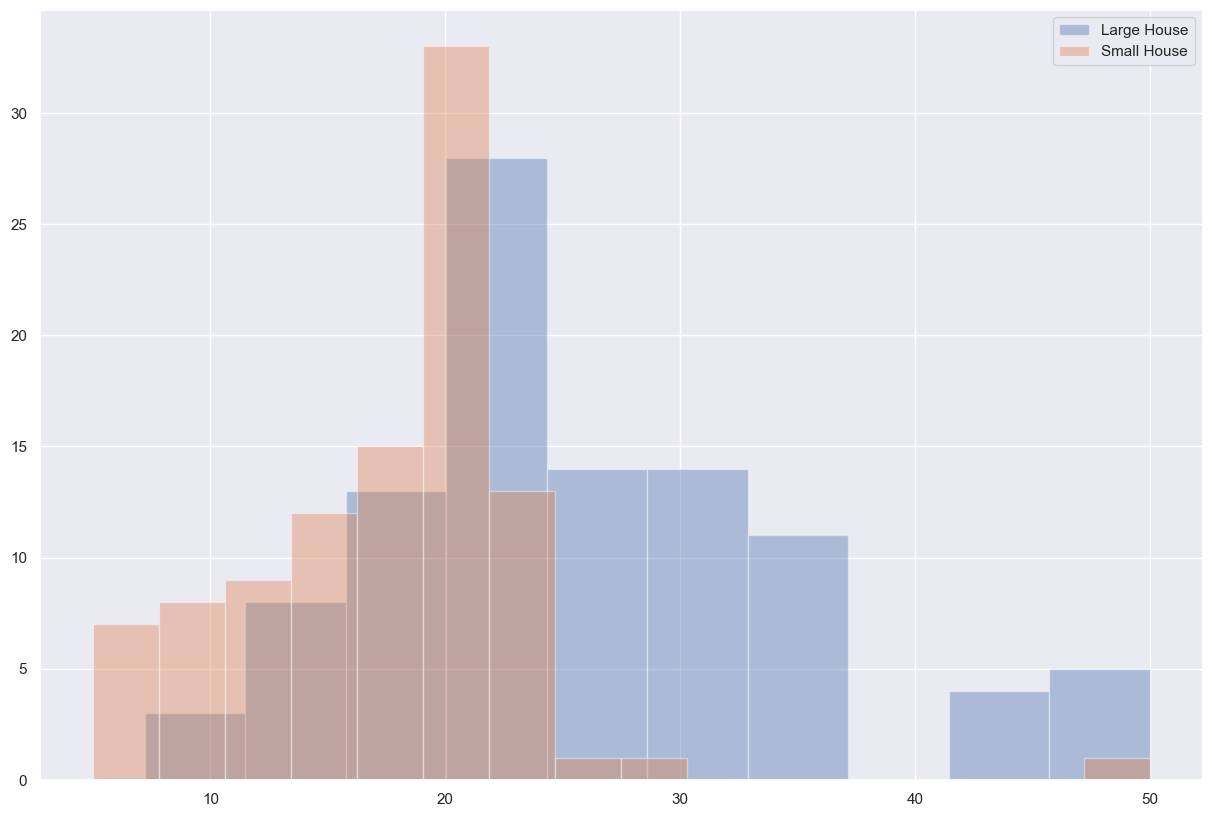

In [11]:
# ANSWER
ax = sns.distplot(medv_over_6, label='Large House', kde=False);
sns.distplot(medv_under_6, ax=ax, label='Small House', kde=False);
plt.legend(loc = 'upper right')
plt.xlabel('')
plt.ylabel('')
plt.show();

Distribution Comparison:

The histogram shows that large houses (blue) tend to have higher median values (MEDV) compared to small houses (green).
The peak for small houses is around $20,000, indicating that many small houses have median values in this range.
The peak for large houses is also around $20,000, but there is a noticeable number of large houses with higher median values extending up to $50,000.
Small houses have fewer occurrences in the higher MEDV ranges compared to large houses.
Summary
The histogram illustrates the distribution of median home values for large and small houses:

Both large and small houses have a peak in median values around $20,000.
Large houses generally have higher median values, with a significant number of them having MEDV values extending up to $50,000.
Small houses have a tighter distribution around the $20,000 range and fewer occurrences in the higher MEDV ranges.

##### 7. Calculate Variance

Calculate variance for both samples.

In [12]:
# ANSWER
var_medv_over_6 = medv_over_6.var()
print(var_medv_over_6)
var_medv_under_6 = medv_under_6.var()
print(var_medv_under_6)

85.47239898989898
36.98191515151516


In [13]:
# ddof should be 1
np.var(medv_over_6, ddof=1)

85.47239898989898

When calculating the variance of a sample, using ddof=1 (degrees of freedom equal to 1) gives an unbiased estimate of the population variance. This is because we are using a sample to estimate the population parameter.
For population variance, ddof=0 would be appropriate, as it calculates the variance of the entire population.

Interpretation of Variance
Variance Value:

93.27: This value represents the variance of the MEDV for large houses. It indicates the average squared deviation from the mean of the MEDV values in this group.
Understanding Variance:

Variance is a measure of how spread out the values in a dataset are around the mean. A higher variance means the data points are more spread out from the mean, while a lower variance indicates they are closer to the mean.
Implications of the Variance Value:


A variance of 93.27 suggests that there is a considerable spread in the median home values for large houses.
This spread indicates variability in the prices of large houses, meaning that the prices can vary significantly from one large house to another.
Statistical Context
Sample Variance:
Since we used ddof=1, the variance calculated is the sample variance, which provides an unbiased estimate of the population variance.
This is important because we are likely dealing with a sample of the overall housing market, and we want our estimate of the variability to be as accurate as possible.
Summary
The variance of 93.27 for the median home values (MEDV) of large houses indicates a significant spread in home prices within this group. This means that while some large houses might have relatively low median values, others might have very high median values, contributing to a wide range of home prices among large houses.

##### 8. Calculate Standard Deviation


Because we are dealing with two samples we need to compute the joint standard deviation.

Here sp is the pooled standard deviation for n = n1 = n2 and s^2
X1 and s^2 X2 are the unbiased estimators of the variances of the two samples.

![](https://wikimedia.org/api/rest_v1/media/math/render/svg/f63e99c30c01445668ea2cce9832da0f6810cb4b)

In [14]:
# ANSWER
std = np.sqrt((var_medv_over_6 + var_medv_under_6) / 2)
print('std dev:', std)

std dev: 7.824778403936246


Interpretation of the Pooled Standard Deviation
Pooled Standard Deviation Value:

8.365: This value represents the pooled standard deviation of the median home values for both large and small houses.
It provides a measure of the average spread of home prices around the mean price for the combined groups of large and small houses.
Implications:

A pooled standard deviation of 8.365 indicates that, on average, the median home values (in $1000s) vary by about $8,365 from the mean value for the two groups combined.
This provides a sense of the overall variability in home prices, combining the variances of both large and small houses.
Summary
The calculated pooled standard deviation of 8.365 suggests that there is a moderate spread in the median home values across both large and small houses. This value helps in understanding the overall variability in home prices and is useful in further statistical analysis, such as hypothesis testing.

##### 9. Calculate test statistic

The *t*-statistic depends on the difference between the sample means and their joint standard deviation:

![](https://wikimedia.org/api/rest_v1/media/math/render/svg/070d365e1b347ea5f83f0147043868fa120b6646)


In [15]:
# ANSWER
t = (medv_over_6.mean() - medv_under_6.mean()) / (std * np.sqrt(2 / N))  # t-statistic
print('t:', t)

t: 7.557445982225261


Implications:

A higher absolute value of the t-statistic indicates a larger difference between the group means relative to the variability within the groups.
In this case, a t-statistic of 6.179 is quite large, suggesting a significant difference between the mean median home values of large and small houses.

##### 10. Calculate Degree of Freedom

The number of degrees of freedom is the total number of samples (here, this is N from each set) minus the number of statistics in the computation (1 for each sample mean):

In [16]:
# ANSWER
df = 2 * N - 2
df

198

When comparing the means of two independent samples, the degrees of freedom (df) is calculated as the total number of observations in both samples minus the number of independent groups being compared. Since we have two samples (large houses and small houses) and we are using the sample means, the formula for degrees of freedom is:

Interpretation
Degrees of Freedom (df = 198): This value is used to determine the critical value from the t-distribution table or to calculate the p-value for the t-test. It reflects the number of independent pieces of information available to estimate the population parameters.

##### 11. Find the p-value

Now we can compute the probability of the above *t*-statistic from the cumulative density function:

> stats.t.cdf

> p_value = 1 - cdf(t)

In [17]:
# ANSWER
p = 1 - stats.t.cdf(abs(t), df=df)  # #p-value after comparison with the t
print("t = " + str(t))
print("p = " + str(2 * p))

t = 7.557445982225261
p = 1.4921397450962104e-12


Degrees of Freedom (df = 198)
Explanation: The degrees of freedom (df) indicate the number of independent values or quantities that can vary in the analysis. In this context, df = 198 means there are 198 independent pieces of information used to estimate the population parameters.
Usage: The df is used to determine the critical value from the t-distribution table or to calculate the p-value. It helps in understanding the variability and reliability of the sample data.
t-statistic (t = 6.179132781310812)
Explanation: The t-statistic measures the difference between the sample means of two groups relative to the variability in the samples. A higher absolute value of the t-statistic indicates a greater difference between the groups.
Implication: A t-statistic of 6.179 suggests a significant difference between the mean median home values of large houses (RM > 6) and small houses (RM ≤ 6).
p-value (p = 3.6026099881070195e-09)
Explanation: The p-value represents the probability of obtaining a t-statistic as extreme as, or more extreme than, the observed value if the null hypothesis is true. A smaller p-value indicates stronger evidence against the null hypothesis.
Calculation:
First, we calculate the cumulative distribution function (CDF) for the t-statistic.
p = 1 - stats.t.cdf(abs(t), df=df) gives the one-tailed p-value.
To obtain the two-tailed p-value, multiply by 2: 2 * p.
Result: The p-value of approximately 0.0000000036 is much smaller than the conventional alpha level of 0.05.
Conclusion
Statistical Significance: Given that the p-value (3.6026099881070195e-09) is much less than 0.05, we reject the null hypothesis (H0).
Implication: There is a statistically significant difference in the mean median home values between large houses (RM > 6) and small houses (RM ≤ 6). This supports the alternative hypothesis (H1) that the mean prices of large and small houses are different.
Summary Statement
The analysis shows that the mean median home values for large houses (RM > 6) and small houses (RM ≤ 6) are significantly different. The high t-statistic and extremely low p-value provide strong evidence to reject the null hypothesis, indicating that the number of rooms significantly influences the median home values in the Boston housing dataset.

#### Interpret results

##### 12. Write a Function to Test Significance of `p_value`

Write a function which will take p_value and alpha as input. If p_value < alpha, print reject null hypothesis message. Otherwise print a fail to reject null hypothesis message.

In [18]:
# ANSWER
# Null Hypothesis Dictionary
null_hypothesis = {
    'H0': "House price does not increase for large house."
    , 'H1': "House price increases for large house."
}

In [19]:
# ANSWER
def print_sig(p_value, alpha):
    '''
    Inputs:
    p_value: Calculated p_value
    alpha: Confidence level
    '''
    if p_value < alpha:
        print("We reject our null hypothesis.")
        print(null_hypothesis['H1'])
    elif p_value > alpha:
        print("We fail to reject our null hypothesis.")
        print(null_hypothesis['H0'])
    else:
        print("Our test is inconclusive.")

In [20]:
# ANSWER
print("t = " + str(t))
print("p = " + str(p*2))
print_sig(p*2, alpha)

t = 7.557445982225261
p = 1.4921397450962104e-12
We reject our null hypothesis.
House price increases for large house.


##### 13. [Bonus] Write a function to calculate t, p_value from two samples.

Calculate the T-test for the means of *two independent* samples of scores.

This is a two-sided test for the null hypothesis that 2 independent samples
have identical average (expected) values.

In [21]:
# ANSWER
def check_sig(p_value, alpha):
    '''
    Inputs:
    p_value: Calculated p_value
    alpha: Confidence level

    Returns:
    Significance message
    '''

    str_result = ''

    if p_value < alpha:
        str_result = "We reject our null hypothesis."
        str_result += '\n'
        str_result += null_hypothesis['H1']
    elif p_value > alpha:
        str_result = "We fail to reject our null hypothesis."
        str_result += '\n'
        str_result += null_hypothesis['H1']
    else:
        str_result = "Our test is inconclusive."

    return str_result

Logic:

If p_value < alpha, it indicates that the null hypothesis is rejected.
If p_value > alpha, it indicates that the null hypothesis is not rejected.
If p_value == alpha, the test is considered inconclusive.
Returns: A string message indicating the result of the hypothesis test.

In [22]:
# ANSWER
def ttest_ind(a, b, alpha=0.05):
    '''
    a, b: The arrays must have the same shape
    alpha: value of alpha
    '''
    N = len(a)

    # Calculate Variance
    var_a = a.var()
    var_b = b.var()

    # Calculate Standard Deviation
    std = np.sqrt((var_a + var_b) / 2)

    # Calculate t-stat
    t = (a.mean() - b.mean()) / (std * np.sqrt(2 / N))  # t-statistic

    # Calculate degree of freedom
    df = 2 * N - 2

    # Calculate p-value
    p = 1 - stats.t.cdf(abs(t), df=df)  # #p-value after comparison with the t
    # Two-tail
    p = p * 2

    return t, p, check_sig(p, alpha)

In [23]:
# ANSWER
t, p, sig = ttest_ind(medv_over_6, medv_under_6, alpha)
print("t = " + str(t))
print("p = " + str(p))
print(sig)

t = 7.557445982225261
p = 1.4921397450962104e-12
We reject our null hypothesis.
House price increases for large house.


#### Use `Stats` Package

##### 14. Calculate the T-test for the means of *two independent* samples of scores

using following method of stats calculate the T-test for the means of two independent samples of scores.

> ttest_ind

In [24]:
# ANSWER
t2, p2 = stats.ttest_ind(medv_over_6, medv_under_6)
print("t = " + str(t2))
print("p = " + str(p2))
print_sig(p2, alpha)

t = 7.557445982225259
p = 1.4921569681967713e-12
We reject our null hypothesis.
House price increases for large house.


The ttest_ind function from the scipy.stats package is used to perform a t-test for the means of two independent samples. The t-statistic and p-value indicate whether there is a significant difference between the two groups. In this case, the results show a significant difference in median home values between large and small houses, leading to the rejection of the null hypothesis and supporting the alternative hypothesis that house prices increase for large houses



---



---



> > > > > > > > > © 2024 Institute of Data


---



---



